In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
data =  pd.read_csv('archive/water_potability.csv' )
data.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


In [3]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [6]:
data = data.drop(columns="Sulfate",axis=1)
data["ph"].fillna(value = data["ph"].mean(), inplace = True)
data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].mean(), inplace = True)

print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
#Cardinalité du JDD
print('data        : {} colonnes ; {} lignes.'.format(data.shape[1],        data.shape[0]))

data        : 9 colonnes ; 3276 lignes.


In [8]:
## Création de la fonction d'exploration
def Exploration(data):
    """
    """
    cols_names = []
    cols_names.append('Type de variable')
    cols_names.append('Type informatique')
    cols_names.append('Taux de NA (%)')
    cols_names.append('Gestion des NA')
 
    
    # Collecte des informations pour chaque colonne du DataFrame
    dico = {}
    for col in data.columns:
        # 0. Type de variable
        dico[col] = ['TODO']
        
        # 3. Type informatique
        val = str(data[col].dtypes)
        if val == 'object':
            val += ' (' + type(data[col][0]).__name__ + ')'
        dico[col].append(val)
        
        # 4. Taux de NA
        dico[col].append(round(sum(data[col].isna()) / len(data[col]) * 100., 2))
        
        # 5. Gestion des NA
        if dico[col][-1] == 0.:
            dico[col].append('Aucune')
        else:
            dico[col].append('TODO')
        
        
    return pd.DataFrame(np.array([l for l in dico.values()]), columns=cols_names, index=dico.keys())


## Exploration automatique du JDD
data_info = Exploration(data)
data_info

,Type de variable,Type informatique,Taux de NA (%),Gestion des NA
ph,TODO,float64,0.0,Aucune
Hardness,TODO,float64,0.0,Aucune
Solids,TODO,float64,0.0,Aucune
Chloramines,TODO,float64,0.0,Aucune
Conductivity,TODO,float64,0.0,Aucune
Organic_carbon,TODO,float64,0.0,Aucune
Trihalomethanes,TODO,float64,0.0,Aucune
Turbidity,TODO,float64,0.0,Aucune
Potability,TODO,int64,0.0,Aucune


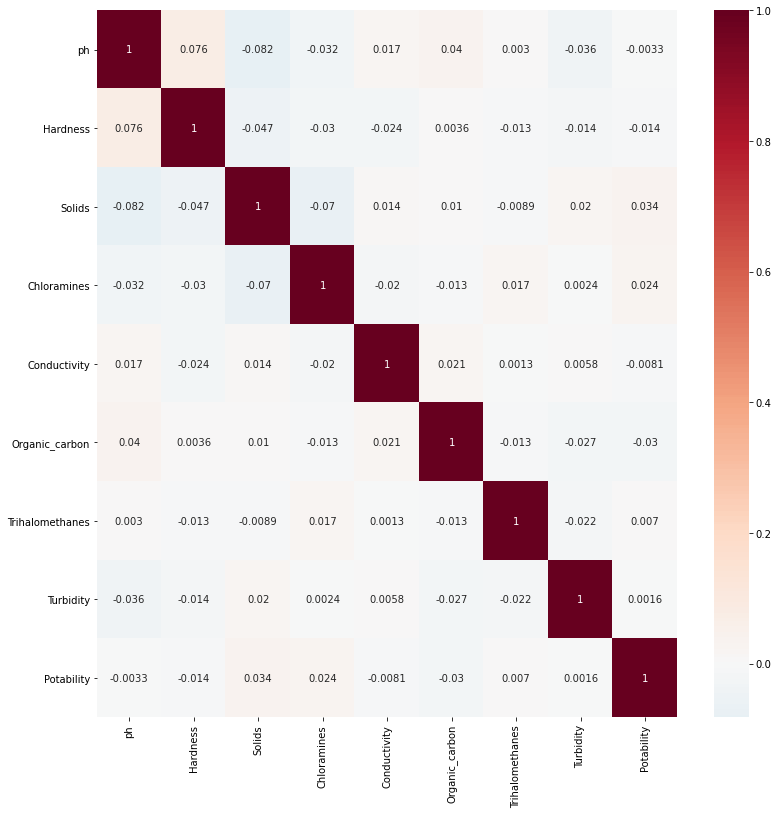

In [9]:
plt.figure(figsize=(13, 13))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', center=0);



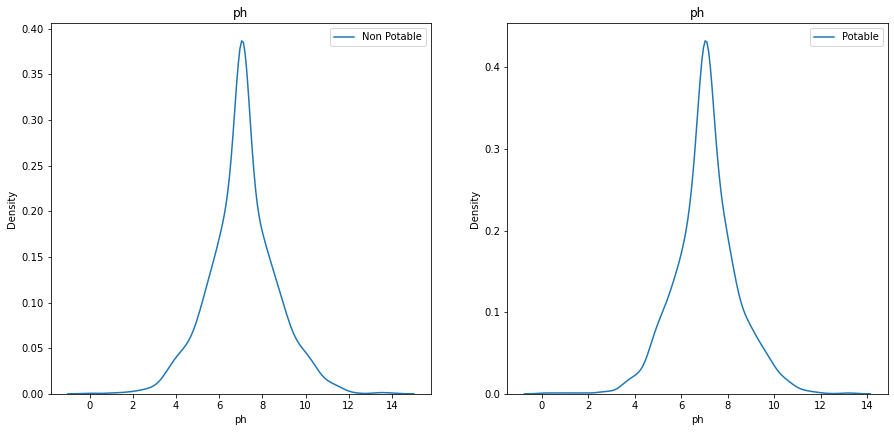

In [10]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.title('ph')
sns.kdeplot(x = non_potable['ph'], label = "Non Potable")
plt.legend()


plt.subplot(2,2,2)
plt.title('ph')
sns.kdeplot(x = potable['ph'], label = "Potable")
plt.legend()

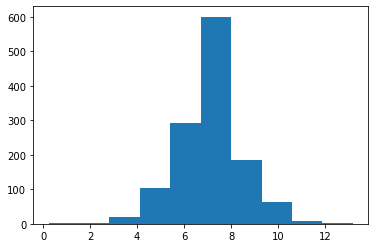

In [11]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.hist(potable.ph)
plt.show()

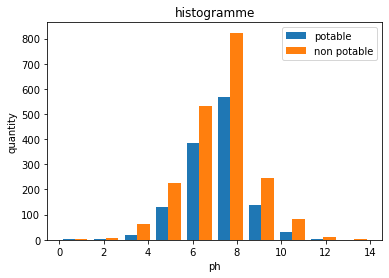

In [12]:
plt.hist([potable.ph,non_potable.ph], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('ph')
plt.title('histogramme')
plt.legend()

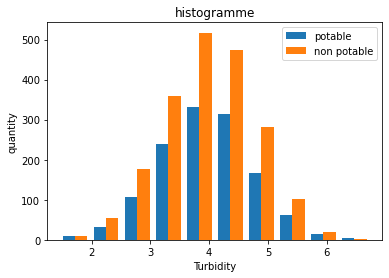

In [13]:
plt.hist([potable.Turbidity,non_potable.Turbidity], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('Turbidity')
plt.title('histogramme')
plt.legend()

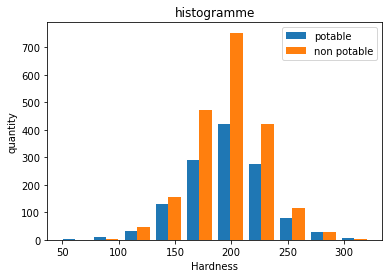

In [14]:
plt.hist([potable.Hardness,non_potable.Hardness], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('Hardness')
plt.title('histogramme')
plt.legend()

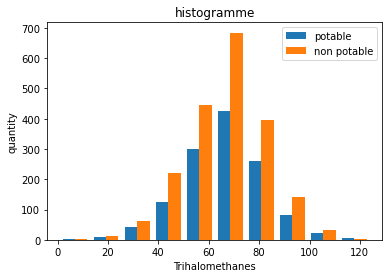

In [15]:
plt.hist([potable.Trihalomethanes,non_potable.Trihalomethanes], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('Trihalomethanes')
plt.title('histogramme')
plt.legend()

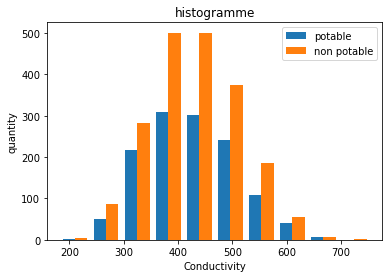

In [16]:
plt.hist([potable.Conductivity,non_potable.Conductivity], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('Conductivity')
plt.title('histogramme')
plt.legend()

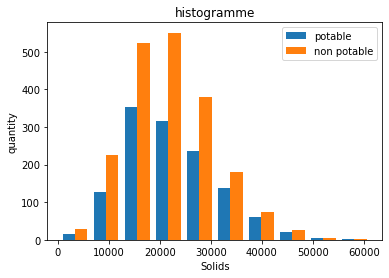

In [17]:
plt.hist([potable.Solids,non_potable.Solids], bins = 10, label = ['potable', 'non potable'])
plt.ylabel('quantity')
plt.xlabel('Solids')
plt.title('histogramme')
plt.legend()

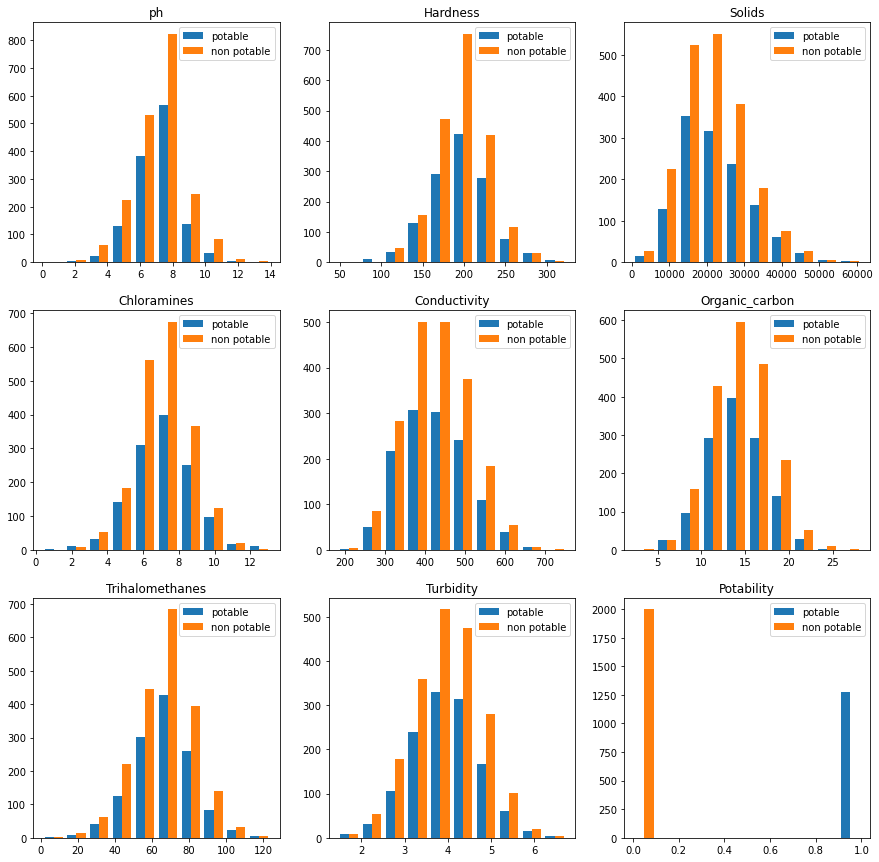

In [19]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plt.hist([potable[col],non_potable[col]], bins = 10, label = ['potable', 'non potable'])
    plt.legend()